<a href="https://colab.research.google.com/github/fergarcat/eda-usa-income/blob/main/EDA_USA_Urban_Rural_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Income and Urban VS Rural For Each County in USA. Exploratory Data Analysis**

#**Dataset Explanation**


###**Overview**
This dataset provides insights into the population distribution and income levels across counties in the United States, with a classification of counties as either "Urban" or "Rural." The data was sourced from the U.S. Census Bureau's 2023 American Community Survey (ACS).

###**Methodology**
####Data Source:
>PI Endpoint: U.S. Census Bureau ACS 2023 API

>Variables:
>B01003_001E: Total population.
>B19013_001E: Median household income.
####Processing:

>Counties were classified as "Urban" if their population was above the median population; otherwise, they were classified as "Rural."
FIPS codes were generated by concatenating State and County FIPS codes.
####Columns:

>**County**: County name.

>**State**: State name.

>**FIPS**: Combined state and county FIPS code.

>**State FIPS Code**: State's Federal Information Processing Standard code.

>**County FIPS Code**: County's FIPS code.

>**Total Population**: Total population of the county.

>**Median Household Income**: Median household income for the county.

>**Urban-Rural**: Classification based on population (Urban or Rural).
###**Usage**
This dataset can be used for:

>Urban vs. rural demographic and economic analysis.

>Income distribution studies.

>Data visualization and mapping using FIPS codes.
###**License**
This dataset is provided under the public domain. Proper attribution to the U.S. Census Bureau is appreciated.

#Load Kaggle API Key
Check next documentation to get one:
- https://www.kaggle.com/docs/api
- https://github.com/Kaggle/kaggle-api

In [ ]:
import os
import shutil
#Upload file
from google.colab import files
files.upload()

# Make kaggle folder
os.makedirs("/root/.config/kaggle", exist_ok=True)

# Move uploaded file
shutil.move("kaggle.json", "/root/.config/kaggle/kaggle.json")

# Grant permissions
os.chmod("/root/.config/kaggle/kaggle.json", 600)

# Check if file exists
print(os.path.exists("/root/.config/kaggle/kaggle.json"))  # Esto debe imprimir True



Saving kaggle.json to kaggle.json
True


#**Libraries to import**

In [ ]:
%%capture
!pip install kaggle
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
import kagglehub
import pandas as pd
import kaggle
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


#**DATASOURCE**

#**Transform kaggle file**

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
kaggle.api.dataset_download_files('ahmedmohamed2003/income-urban-vs-rural-for-each-county', path='content/kaggle_files', unzip=True)
kaggle.api.dataset_download_files('alejopaullier/usa-counties-coordinates', path='content/kaggle_files', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/ahmedmohamed2003/income-urban-vs-rural-for-each-county
Dataset URL: https://www.kaggle.com/datasets/alejopaullier/usa-counties-coordinates


In [ ]:

# Ruta al archivo descargado, ajusta la ruta si es necesario
file_income_urban_vs_rural = "/content/content/kaggle_files/Income_Urban_VS_Rural.csv"
file_cfips_location = "/content/content/kaggle_files/cfips_location.csv"

# Leer el archivo CSV en un DataFrame
df_income = pd.read_csv(file_income_urban_vs_rural)
df_location = pd.read_csv(file_cfips_location)





#**Merge dataframes**

In [ ]:
df=df_income.merge(df_location, how="left", left_on = "FIPS", right_on="cfips")

#**Data Preview**
Using info, describe and head methons I make a first approach to the data.

In [ ]:
df_income.info()
df_income.describe()
df_income.head()
df_income.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   County                   3222 non-null   object
 1   State                    3222 non-null   object
 2   FIPS                     3222 non-null   int64 
 3   State FIPS Code          3222 non-null   int64 
 4   County FIPS Code         3222 non-null   int64 
 5   Total Population         3222 non-null   int64 
 6   Median Household Income  3222 non-null   int64 
 7   Urban-Rural              3222 non-null   object
dtypes: int64(5), object(3)
memory usage: 201.5+ KB


,0
County,0
State,0
FIPS,0
State FIPS Code,0
County FIPS Code,0
Total Population,0
Median Household Income,0
Urban-Rural,0


In [ ]:
df_location.info()
df_location.describe()
df_location.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cfips   3233 non-null   int64  
 1   name    3233 non-null   object 
 2   lng     3233 non-null   float64
 3   lat     3233 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.2+ KB


,cfips,name,lng,lat
0,1059,Franklin,-87.843283,34.442381
1,13111,Fannin,-84.319296,34.864126
2,19109,Kossuth,-94.206898,43.204140
3,40115,Ottawa,-94.810589,36.835878
4,42115,Susquehanna,-75.800905,41.821277


In [ ]:
df.info()
df.describe()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   County                   3222 non-null   object 
 1   State                    3222 non-null   object 
 2   FIPS                     3222 non-null   int64  
 3   State FIPS Code          3222 non-null   int64  
 4   County FIPS Code         3222 non-null   int64  
 5   Total Population         3222 non-null   int64  
 6   Median Household Income  3222 non-null   int64  
 7   Urban-Rural              3222 non-null   object 
 8   cfips                    3209 non-null   float64
 9   name                     3209 non-null   object 
 10  lng                      3209 non-null   float64
 11  lat                      3209 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 302.2+ KB


,0
County,0
State,0
FIPS,0
State FIPS Code,0
County FIPS Code,0
Total Population,0
Median Household Income,0
Urban-Rural,0
cfips,13
name,13


## Check for null values

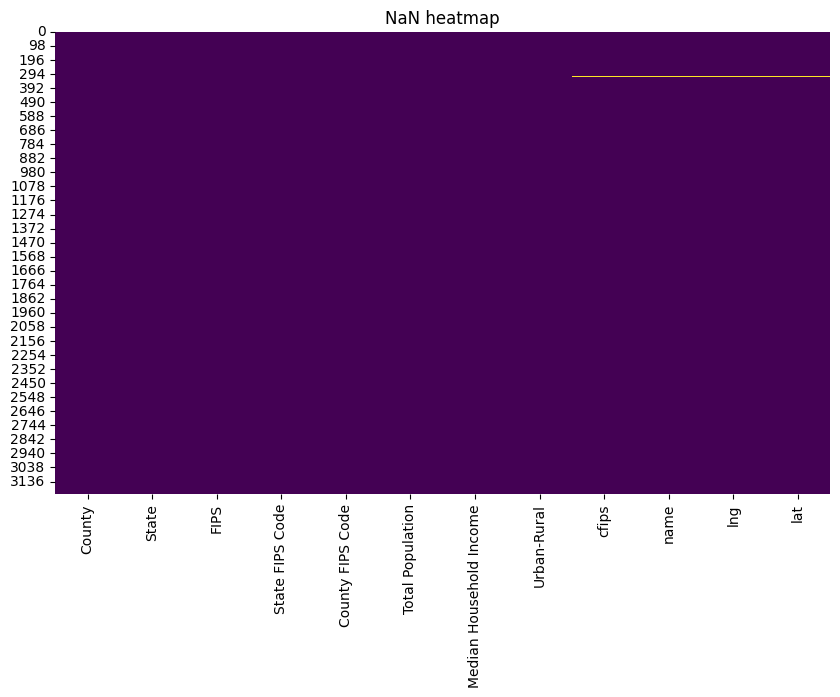

In [ ]:
# Heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("NaN heatmap")
plt.show()



> **!** Ass seen above, we have several null values



In [ ]:
df=df_income.merge(df_location, how="left", left_on = "FIPS", right_on="cfips")
print(df[df.cfips.isnull()])

                                              County         State   FIPS  \
72                               Chugach Census Area        Alaska   2063   
73                          Copper River Census Area        Alaska   2066   
83                              Kusilvak Census Area        Alaska   2158   
309                          Capitol Planning Region   Connecticut   9110   
310               Greater Bridgeport Planning Region   Connecticut   9120   
311   Lower Connecticut River Valley Planning Region   Connecticut   9130   
312                 Naugatuck Valley Planning Region   Connecticut   9140   
313         Northeastern Connecticut Planning Region   Connecticut   9150   
314                  Northwest Hills Planning Region   Connecticut   9160   
315        South Central Connecticut Planning Region   Connecticut   9170   
316         Southeastern Connecticut Planning Region   Connecticut   9180   
317              Western Connecticut Planning Region   Connecticut   9190   



> Missing join values
Alaska(2063,2066,2158) and Connecticut(9110) cfips codes are missing in the location dataset





> Fill in the gaps
Since it's an small amount of rows, I type in the proper values of the locations



In [ ]:
df.loc[df.FIPS == 2063, ['cfips', 'name', 'lng', 'lat']] = [2063, df.loc[df.FIPS == 2063, "County"].values[0], -134.4197, 63.5887]
df.loc[df.FIPS == 2066, ['cfips', 'name', 'lng', 'lat']] = [2066, df.loc[df.FIPS == 2066, "County"].values[0], -131.046, 60.7968]
df.loc[df.FIPS == 2158, ['cfips', 'name', 'lng', 'lat']] = [2158, df.loc[df.FIPS == 2158, "County"].values[0], -131.698, 64.8569]

df.loc[df.FIPS == 9110, ['cfips', 'name', 'lng', 'lat']] = [9110, df.loc[df.FIPS == 9110, "County"].values[0], -72.7107, 41.5972]
df.loc[df.FIPS == 9120, ['cfips', 'name', 'lng', 'lat']] = [9120, df.loc[df.FIPS == 9120, "County"].values[0], -72.4621, 41.7082]
df.loc[df.FIPS == 9130, ['cfips', 'name', 'lng', 'lat']] = [9130, df.loc[df.FIPS == 9130, "County"].values[0], -72.9669, 41.2151]
df.loc[df.FIPS == 9140, ['cfips', 'name', 'lng', 'lat']] = [9140, df.loc[df.FIPS == 9140, "County"].values[0], -72.6821, 41.1415]
df.loc[df.FIPS == 9150, ['cfips', 'name', 'lng', 'lat']] = [9150, df.loc[df.FIPS == 9150, "County"].values[0], -72.7279, 41.3671]
df.loc[df.FIPS == 9160, ['cfips', 'name', 'lng', 'lat']] = [9160, df.loc[df.FIPS == 9160, "County"].values[0], -72.5813, 41.4781]
df.loc[df.FIPS == 9170, ['cfips', 'name', 'lng', 'lat']] = [9170, df.loc[df.FIPS == 9170, "County"].values[0], -72.7407, 41.6244]
df.loc[df.FIPS == 9180, ['cfips', 'name', 'lng', 'lat']] = [9180, df.loc[df.FIPS == 9180, "County"].values[0], -72.8972, 41.2834]
df.loc[df.FIPS == 9190, ['cfips', 'name', 'lng', 'lat']] = [9190, df.loc[df.FIPS == 9190, "County"].values[0], -72.6679, 41.5283]
df.loc[df.FIPS == 46102, ['cfips', 'name', 'lng', 'lat']] = [46102, df.loc[df.FIPS == 46102, "County"].values[0], -102.599, 45.6521]


In [ ]:
df.head()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural,cfips,name,lng,lat
0,Autauga County,Alabama,01001,1,1,59285,69841,Urban,1001.0,Autauga,-86.642900,32.535142
1,Baldwin County,Alabama,01003,1,3,239945,75019,Urban,1003.0,Baldwin,-87.722745,30.727825
2,Barbour County,Alabama,01005,1,5,24757,44290,Rural,1005.0,Barbour,-85.391068,31.870090
3,Bibb County,Alabama,01007,1,7,22152,51215,Rural,1007.0,Bibb,-87.126814,32.998376
4,Blount County,Alabama,01009,1,9,59292,61096,Urban,1009.0,Blount,-86.567006,33.980871


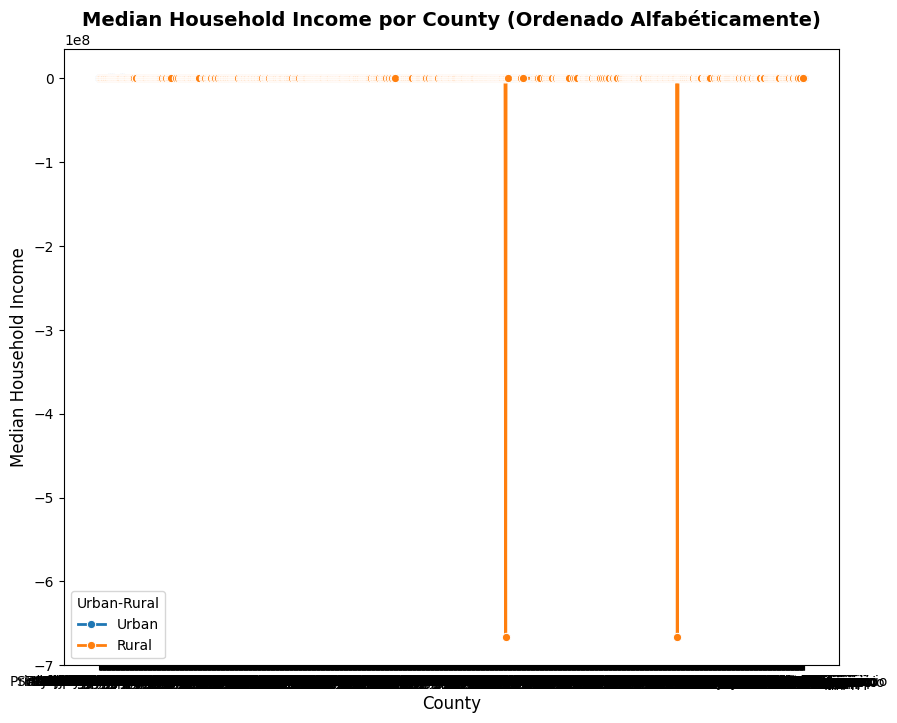

In [ ]:

# Graficar
plt.figure(figsize=(10, 8))
sns.lineplot(x="County",y="Median Household Income", data=df,hue='Urban-Rural',
             estimator="sum", errorbar=None, marker="o", linewidth=2,
             )

# Mejorar los títulos
plt.title("Median Household Income por County (Ordenado Alfabéticamente)", fontsize=14, fontweight="bold")
plt.ylabel("Median Household Income", fontsize=12)
plt.xlabel("County", fontsize=12)

# Mostrar el gráfico
plt.show()


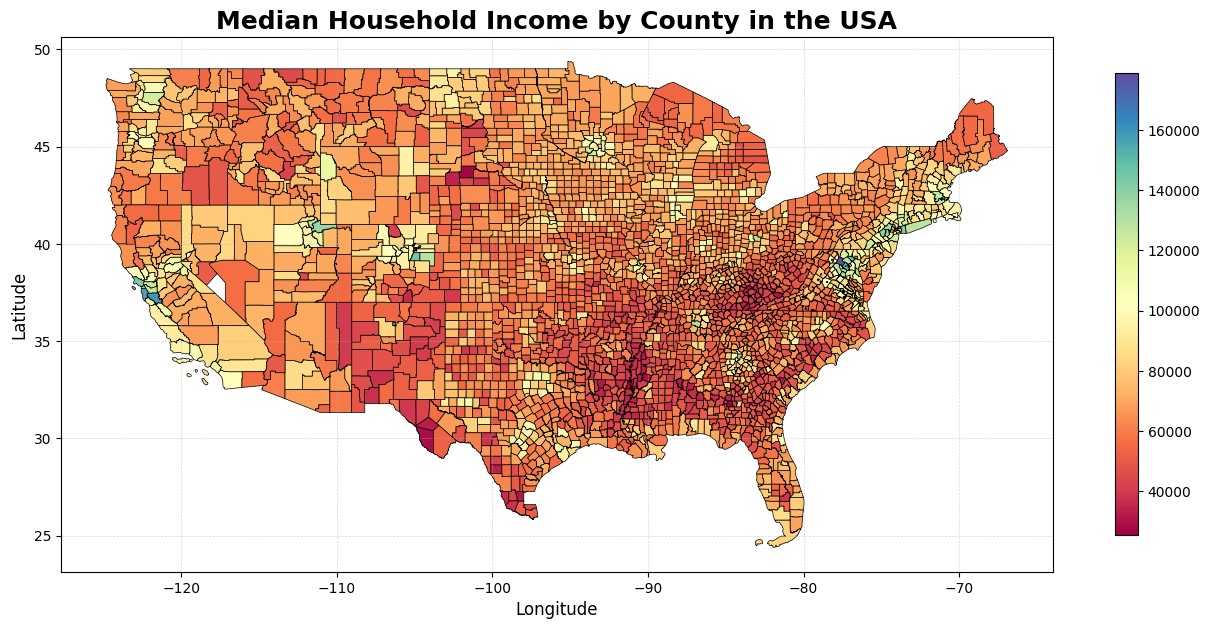

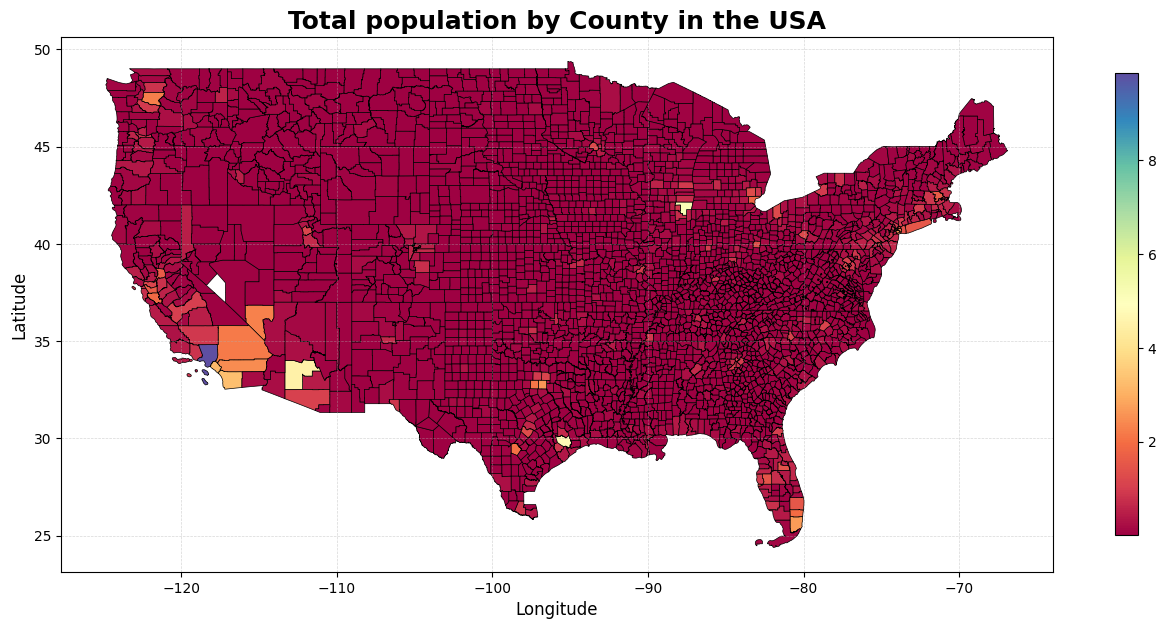

In [ ]:
# Cargar el shapefile de los condados de EE.UU.
usa_counties = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2023/COUNTY/tl_2023_us_county.zip")

# Convertir FIPS a string con 5 caracteres
df['FIPS'] = df['FIPS'].astype(str).str.zfill(5)
usa_counties['GEOID'] = usa_counties['GEOID'].astype(str).str.zfill(5)

# Filtrar el mapa de EE.UU. para excluir Alaska, Hawái y Puerto Rico
usa_counties = usa_counties.cx[-130:-60, 23:50]  # Filtra por bounding box del territorio continental

# Unir los datos de ingresos con los datos geoespaciales
map_df = usa_counties.merge(df, left_on="GEOID", right_on="FIPS", how="left")
# Si hay valores negativos o nulos, filtrarlos o corregirlos
map_df = map_df[map_df['Median Household Income'] > 0]  # Eliminar valores negativos
map_df = map_df.dropna(subset=['Median Household Income'])  # Eliminar NaN
map_df = map_df[map_df['Total Population'] > 0]  # Eliminar valores negativos
map_df = map_df.dropna(subset=['Total Population'])  # Eliminar NaN
map_df['Total Population'] = map_df['Total Population'] / 1e6  # Convertir a millones


# # Filtrar para excluir datos con longitud mayor a 150
# map_df = map_df[(map_df['lng'] >= -180) & (map_df['lng'] <= -30) &
#                 (map_df['lat'] >= -56) & (map_df['lat'] <= 83)]



# Graficar el mapa con ajustes mejorados
fig, ax = plt.subplots(1, 1, figsize=(16, 10))  # Aumentar el tamaño del gráfico
map_df.plot(column='Median Household Income',
            cmap='Spectral',
            linewidth=0.5,  # Bordes más delgados
            edgecolor='black',
            legend=True,
            legend_kwds={"shrink": 0.6},  # Hacer la leyenda más compacta
            ax=ax)

# Mejorar los títulos y diseño
ax.set_title("Median Household Income by County in the USA", fontsize=18, fontweight="bold")
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.axis("on")  # Mantener los ejes visibles
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)  # Agregar cuadrícula suave
plt.show()


# Graficar el mapa con ajustes mejorados
fig, ax = plt.subplots(1, 1, figsize=(16, 10))  # Aumentar el tamaño del gráfico
map_df.plot(column='Total Population',
            cmap='Spectral',
            linewidth=0.5,  # Bordes más delgados
            edgecolor='black',
            legend=True,
            legend_kwds={"shrink": 0.6},  # Hacer la leyenda más compacta
            ax=ax)

# Mejorar los títulos y diseño
ax.set_title("Total population by County in the USA", fontsize=18, fontweight="bold")
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.axis("on")  # Mantener los ejes visibles
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)  # Agregar cuadrícula suave
plt.show()
